# Read of L3 AIRS Data on O3 during One Year from Pandas
------------------------------------------------------------------

- author: Sylvie Dagoret-Campagne
- creation November 22 Novembre 2016


### purpose:

Analyse AIRS instrument data from AQUA satellite for LSST air transparency simulation

- http://acdisc.gsfc.nasa.gov/data/Aqua_AIRS_Level3/AIRX3STM.006/

These data are provided by the Goddard Earth Science:

- http://disc.gsfc.nasa.gov/acdisc


## 1) python libraries
---------------------------

In [2]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dagoret-campagnesylvie/.local/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import datetime

In [4]:
from matplotlib.dates import MonthLocator, WeekdayLocator,DateFormatter
from matplotlib.dates import MONDAY

In [5]:
mondays = WeekdayLocator(MONDAY)
months = MonthLocator(range(1, 13), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%b '%y")

In [6]:
import os
import re
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [7]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [8]:
import pyhdf

In [9]:
from pyhdf.SD import SD,SDC

In [10]:
import libAIRSL3Data as airs  # My own library

In [11]:
############################################################################
def ensure_dir(f):
    d = os.path.dirname(f)
    if not os.path.exists(f):
        os.makedirs(f)
#########################################################################

## 1)  Configuration
-------------------------

In [12]:
# where are the HDF files
# 9 month
#HDFEOS_ZOO_DIR="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/NASA_AIRS_AQUA_DATA/AIRH3STM/2016/h4" 
# 10 months
HDFEOS_ZOO_DIR="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/NASA_AIRS_AQUA_DATA/AIRS3STM/2016/h4"

In [13]:
path=HDFEOS_ZOO_DIR

In [14]:
# The selected data field
DATAFIELD_NAME =  'TotO3_D'   # Select Ozone column Depth

In [15]:
DATAFIELD_UNIT = DATAFIELD_NAME+'(Dobson)'  # Unit

In [16]:
DATA_TITLE = 'Ozone column depth measured by AIRS in 2016'  # Title in figures

In [17]:
pandas_filename='AIRS_2016_'+DATAFIELD_NAME+'.csv'
pandas_fieldname=['dates','average','ct','err','std','min','max']

In [18]:
figfilename1='AIRS2016_'+DATAFIELD_NAME+'.jpg'
figfilename2='AIRS2016_'+DATAFIELD_NAME+'pres'+'.jpg'

In [19]:
# Select observatory
loc=airs.observatory_location('ctio')

### 1.2) Getting the list of the files
------------------------------

In [20]:
dataset=pd.read_csv(pandas_filename)

In [ ]:
dates_data=dataset[pandas_fieldname[0]]

In [21]:
for the_date in dates_data:
    the_year_str=the_date.split('-')[0]
    the_month_str=the_date.split('-')[1]
    print the_date,' ',the_year_str,' ',the_month_str 

2016-01-01
2016-01-01   2016   01
2016-02-01
2016-02-01   2016   02
2016-03-01
2016-03-01   2016   03
2016-04-01
2016-04-01   2016   04
2016-05-01
2016-05-01   2016   05
2016-06-01
2016-06-01   2016   06
2016-07-01
2016-07-01   2016   07
2016-08-01
2016-08-01   2016   08
2016-09-01
2016-09-01   2016   09
2016-10-01
2016-10-01   2016   10


## extract 

In [28]:

dates_data=dataset[pandas_fieldname[0]]
data_month_aver=dataset[pandas_fieldname[1]]
av=data_month_aver.mean()
data_month_sdev=dataset[pandas_fieldname[4]]
data_month_ct=dataset[pandas_fieldname[2]]
data_month_err=dataset[pandas_fieldname[3]]
data_month_p1std=data_month_aver+data_month_sdev
data_month_m1std=data_month_aver-data_month_sdev
data_month_min=dataset[pandas_fieldname[5]]
data_month_max=dataset[pandas_fieldname[6]]
NBFILES=dates_data.shape[0]

## 3) Plots

### Plot varation month to month

In [26]:
YMIN=0
YMAX=600

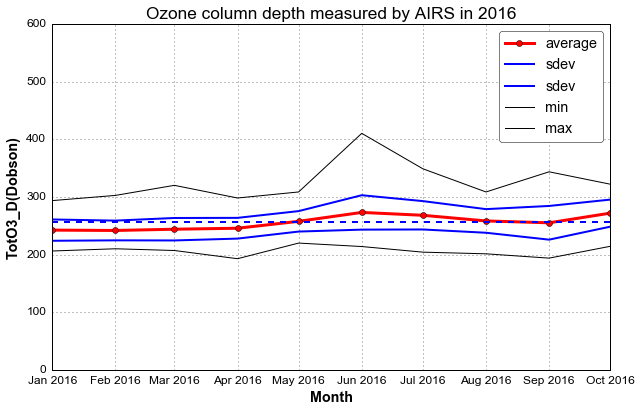

In [29]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)

ax.plot_date(dates_data, data_month_aver,'ro-',label='average',linewidth=3)
ax.plot_date(dates_data, data_month_p1std,'b-',label='sdev',linewidth=2)
ax.plot_date(dates_data, data_month_m1std,'b-',label='sdev',linewidth=2)
ax.plot_date(dates_data, data_month_min,'k-',label='min',linewidth=1)
ax.plot_date(dates_data, data_month_max,'k-',label='max',linewidth=1)


avline=np.ones(NBFILES)*av
ax.plot_date(dates_data, avline,'b--',linewidth=2)

ax.set_ylim(YMIN,YMAX)


ax.set_ylabel(DATAFIELD_UNIT)
ax.set_xlabel('Month')

ax.grid(True)


plt.title(DATA_TITLE)
plt.legend(loc='best')

plt.savefig(figfilename1, bbox_inches='tight')

### Plot relative error

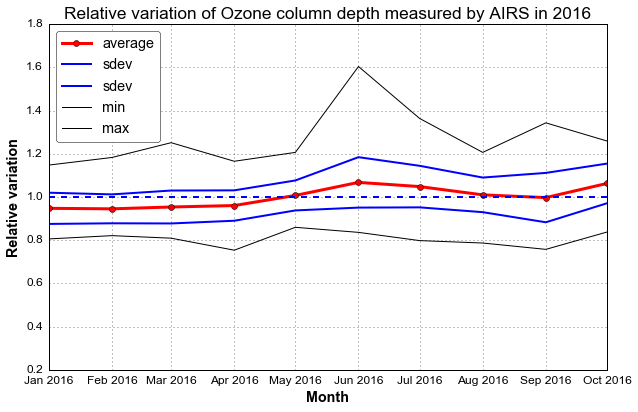

In [30]:

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)

ratio_data_month_aver=data_month_aver/av

ratio_data_month_p1std= data_month_p1std/av
ratio_data_month_m1std =data_month_m1std/av

ratio_data_month_min = data_month_min/av
ratio_data_month_max = data_month_max/av

ax.plot_date(dates_data, ratio_data_month_aver,'ro-',label='average',linewidth=3)
ax.plot_date(dates_data, ratio_data_month_p1std,'b-',label='sdev',linewidth=2)
ax.plot_date(dates_data, ratio_data_month_m1std,'b-',label='sdev',linewidth=2)
ax.plot_date(dates_data, ratio_data_month_min,'k-',label='min',linewidth=1)
ax.plot_date(dates_data, ratio_data_month_max,'k-',label='max',linewidth=1)


avline=np.ones(NBFILES)
ax.plot_date(dates_data, avline,'b--',linewidth=2)

ax.set_ylim(0.2,1.8)


ax.set_ylabel('Relative variation')
ax.set_xlabel('Month')

ax.grid(True)

title = 'Relative variation of '+ DATA_TITLE
plt.title(title)
plt.legend(loc='best')
plt.savefig(figfilename2, bbox_inches='tight')